#### NumPy and Vector Operations

#### Array Operations

##### 1. Basic Array Creation and Operations:

In [6]:
import numpy as np

# Creating arrays
array_1d = np.array([1, 2, 3, 4, 5])
array_2d = np.array([[1, 2, 3], [4, 5, 6]])
zeros = np.zeros((3, 3))
ones = np.ones((2, 4))
random_array = np.random.random((3, 3))

# Exercise 1: Create an array of evenly spaced numbers
# Useful for creating embedding dimensions or attention layers
x = np.linspace(0, 10, 100)  # 100 points between 0 and 10

# Exercise 2: Reshape operations
# Common in transforming data for neural network inputs
original = np.array([1, 2, 3, 4, 5, 6])
reshaped = original.reshape(2, 3)
print(original, reshaped)

[1 2 3 4 5 6] [[1 2 3]
 [4 5 6]]


##### 2. Array Indexing and Slicing

In [7]:
# Advanced indexing
array_2d = np.array([[1, 2, 3], 
                     [4, 5, 6],
                     [7, 8, 9]])

# Exercise 3: Extract specific elements
# Get elements > 5
mask = array_2d > 5
filtered = array_2d[mask]

# Exercise 4: Fancy indexing
indices = np.array([0, 2])
selected_rows = array_2d[indices]
print(selected_rows)

[[1 2 3]
 [7 8 9]]


##### 3. Mathematical Operations

In [8]:
# Exercise 5: Element-wise operations
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

addition = array1 + array2
multiplication = array1 * array2
exponential = np.exp(array1)
logarithm = np.log(array1)

# Exercise 6: Matrix operations
matrix1 = np.array([[1, 2], [3, 4]])
matrix2 = np.array([[5, 6], [7, 8]])

# Matrix multiplication (crucial for neural network layers)
dot_product = np.dot(matrix1, matrix2)
# or
matrix_product = matrix1 @ matrix2
print(matrix_product)

[[19 22]
 [43 50]]


##### 4. Broadcasting

In [9]:
# Exercise 7: Broadcasting with different shapes
matrix = np.array([[1, 2, 3],
                  [4, 5, 6]])
vector = np.array([10, 20, 30])

# Broadcasting the vector across each row
broadcasted = matrix + vector

# Exercise 8: Broadcasting with dimensions
array_3d = np.random.random((3, 4, 5))
array_2d = np.random.random((4, 5))
# Broadcasting across the first dimension
result = array_3d + array_2d
print(result)

[[[0.61578176 0.15212028 1.40683735 0.17210726 0.54772722]
  [0.93918584 0.47912948 0.18782139 0.91190464 0.17737532]
  [1.38484873 0.07668834 0.38012341 1.40896231 0.53560712]
  [1.14630019 1.73712865 0.67696329 1.1248982  1.25522578]]

 [[0.52782386 0.41956791 1.51573287 0.20767379 1.36556653]
  [0.2724281  1.06395331 0.80253777 0.28183605 0.70911749]
  [0.63397481 0.17590356 0.4955363  0.85323566 0.85072373]
  [0.15262266 1.5098641  0.38949707 1.91472139 1.27425726]]

 [[1.08969881 0.16735279 1.30873921 0.96914696 0.97278703]
  [0.96098152 0.75985185 0.11757661 0.74416052 0.55728947]
  [0.68434994 0.60708098 0.50798673 1.31879725 0.3556497 ]
  [0.46514038 1.42827109 0.606397   1.27111881 0.65310077]]]


------

#### Broadcasting Rules
+ Broadcasting is NumPy's way of performing arithmetic operations on arrays of different shapes.
+ It provides a powerful mechanism for performing element-wise operations without creating unnecessary copies of data
+ Key concepts:
    + Arrays must have compatible shapes
    + Operations are performed element-wise
    + Broadcasting reduces memory usage and computation time

In [10]:
# Title: NumPy Broadcasting Rules Tutorial
import numpy as np
import matplotlib.pyplot as plt

# Set printing options for clearer output
np.set_printoptions(precision=2, suppress=True)

##### First Rule - Shape Alignment:

In [11]:
# Rule 1: Arrays are aligned at their last dimension
# Create arrays of different shapes
array_1d = np.array([1, 2, 3])  # Shape: (3,)
array_2d = np.array([[4], [5], [6]])  # Shape: (3, 1)

print("Array 1D shape:", array_1d.shape)
print("Array 2D shape:", array_2d.shape)
print("\nBroadcasted result:")
result = array_1d + array_2d
print(result)

Array 1D shape: (3,)
Array 2D shape: (3, 1)

Broadcasted result:
[[5 6 7]
 [6 7 8]
 [7 8 9]]


##### Shape Compatibility Check:

In [12]:
def check_broadcast_compatibility(shape1, shape2):
    """
    Check if two shapes are broadcast compatible
    Returns True if compatible, False otherwise
    """
    # Pad shorter shape with ones
    diff = len(shape1) - len(shape2)
    if diff > 0:
        shape2 = (1,) * diff + shape2
    elif diff < 0:
        shape1 = (1,) * (-diff) + shape1
    
    # Check compatibility
    for s1, s2 in zip(shape1, shape2):
        if s1 != s2 and s1 != 1 and s2 != 1:
            return False
    return True

# Test cases
shapes = [
    ((3,), (3,)),
    ((3, 1), (3,)),
    ((1, 3), (3,)),
    ((3, 3), (3,)),
    ((3, 2), (2,)),
]

for shape1, shape2 in shapes:
    print(f"Shapes {shape1} and {shape2} are",
          "compatible" if check_broadcast_compatibility(shape1, shape2) else "not compatible")

Shapes (3,) and (3,) are compatible
Shapes (3, 1) and (3,) are compatible
Shapes (1, 3) and (3,) are compatible
Shapes (3, 3) and (3,) are compatible
Shapes (3, 2) and (2,) are compatible


##### Examples

In [14]:
# Example 1: Broadcasting with scalars
array = np.array([[1, 2, 3],
                  [4, 5, 6]])
scalar = 2

print("Original array:")
print(array)
print("\nAfter broadcasting with scalar:")
print(array * scalar)

# Example 2: Broadcasting with vectors
vector = np.array([10, 20, 30])
print("\nBroadcasting array with vector:")
print(array + vector)

# Example 3: Broadcasting in higher dimensions
array_3d = np.random.rand(2, 3, 4)
array_2d = np.random.rand(3, 4)
result = array_3d + array_2d
print("\n3D array shape:", array_3d.shape)
print("2D array shape:", array_2d.shape)
print("Result shape:", result.shape)

Original array:
[[1 2 3]
 [4 5 6]]

After broadcasting with scalar:
[[ 2  4  6]
 [ 8 10 12]]

Broadcasting array with vector:
[[11 22 33]
 [14 25 36]]

3D array shape: (2, 3, 4)
2D array shape: (3, 4)
Result shape: (2, 3, 4)


##### Visual Broadcasting Example

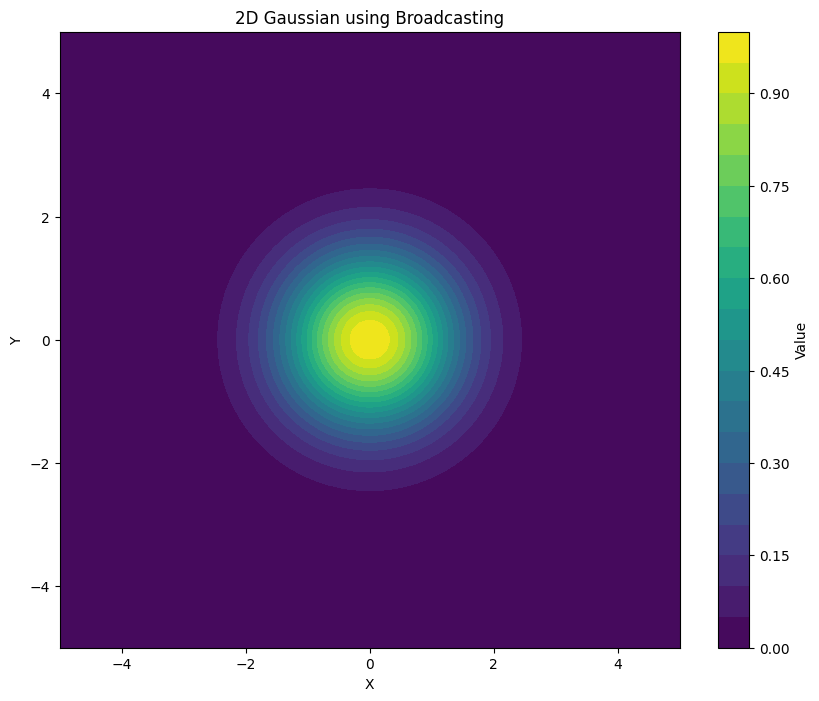

In [15]:
def visualize_broadcasting():
    # Create coordinate matrices
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    
    # Broadcasting in action: create a 2D Gaussian
    Z = np.exp(-(X**2 + Y**2) / 2)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=20)
    plt.colorbar(label='Value')
    plt.title('2D Gaussian using Broadcasting')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

visualize_broadcasting()

--------

### Linear Algebra Operations with NumPy

In [17]:
import numpy as np
from numpy.linalg import inv, det, eig, svd, norm

# Configure NumPy printing options
np.set_printoptions(precision=3, suppress=True)

#### 1. Matrix Creation and Basic Operations
+ First, let's look at different ways to create matrices and perform basic operations.

In [18]:
# Create matrices
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

B = np.array([[9, 8, 7],
              [6, 5, 4],
              [3, 2, 1]])

# Basic matrix operations
print("Matrix A:")
print(A)
print("\nMatrix B:")
print(B)
print("\nMatrix Addition (A + B):")
print(A + B)
print("\nMatrix Multiplication (A @ B):")
print(A @ B)  # or np.matmul(A, B) or np.dot(A, B)

Matrix A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Matrix B:
[[9 8 7]
 [6 5 4]
 [3 2 1]]

Matrix Addition (A + B):
[[10 10 10]
 [10 10 10]
 [10 10 10]]

Matrix Multiplication (A @ B):
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]


#### 2. Matrix Properties and Transformations
+ Let's explore various matrix properties and transformations.

In [19]:
def explore_matrix_properties(matrix):
    """Explore basic properties of a matrix"""
    print(f"Matrix shape: {matrix.shape}")
    print(f"Matrix rank: {np.linalg.matrix_rank(matrix)}")
    print(f"Matrix trace: {np.trace(matrix)}")
    print(f"Matrix determinant: {det(matrix)}")
    print("\nTranspose:")
    print(matrix.T)
    
# Create a non-singular matrix for demonstration
C = np.array([[2, 1, 1],
              [1, 3, 2],
              [1, 2, 4]])

print("Matrix Properties:")
explore_matrix_properties(C)

# Compute inverse
try:
    C_inv = inv(C)
    print("\nInverse matrix:")
    print(C_inv)
    
    # Verify inverse
    print("\nVerification (should be close to identity matrix):")
    print(C @ C_inv)
except np.linalg.LinAlgError as e:
    print("Matrix is not invertible:", e)

Matrix Properties:
Matrix shape: (3, 3)
Matrix rank: 3
Matrix trace: 9
Matrix determinant: 13.0

Transpose:
[[2 1 1]
 [1 3 2]
 [1 2 4]]

Inverse matrix:
[[ 0.615 -0.154 -0.077]
 [-0.154  0.538 -0.231]
 [-0.077 -0.231  0.385]]

Verification (should be close to identity matrix):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### 3. Eigenvalues and Eigenvectors
+ Understanding eigenvalues and eigenvectors is crucial for many applications.

In [20]:
def analyze_eigensystem(matrix):
    """Analyze eigenvalues and eigenvectors of a matrix"""
    eigenvalues, eigenvectors = eig(matrix)
    
    print("Eigenvalues:")
    print(eigenvalues)
    print("\nEigenvectors (columns):")
    print(eigenvectors)
    
    # Verify eigenvalue equation: Av = λv
    for i in range(len(eigenvalues)):
        original = matrix @ eigenvectors[:, i]
        scaled = eigenvalues[i] * eigenvectors[:, i]
        print(f"\nVerification for eigenvalue {eigenvalues[i]:.3f}:")
        print("Av =", original)
        print("λv =", scaled)
        
# Create a symmetric matrix for real eigenvalues
D = np.array([[4, -2, 1],
              [-2, 3, -1],
              [1, -1, 2]])

print("Eigenvalue Analysis:")
analyze_eigensystem(D)

Eigenvalue Analysis:
Eigenvalues:
[6.049 1.643 1.308]

Eigenvectors (columns):
[[-0.737  0.591  0.328]
 [ 0.591  0.328  0.737]
 [-0.328 -0.737  0.591]]

Verification for eigenvalue 6.049:
Av = [-4.458  3.575 -1.984]
λv = [-4.458  3.575 -1.984]

Verification for eigenvalue 1.643:
Av = [ 0.971  0.539 -1.211]
λv = [ 0.971  0.539 -1.211]

Verification for eigenvalue 1.308:
Av = [0.429 0.964 0.773]
λv = [0.429 0.964 0.773]


#### 4. Singular Value Decomposition (SVD)
+ SVD is a powerful matrix factorization method with many applications.

In [21]:
def perform_svd_analysis(matrix):
    """Perform and analyze SVD decomposition"""
    U, s, Vt = svd(matrix)
    
    print("Original matrix:")
    print(matrix)
    print("\nLeft singular vectors (U):")
    print(U)
    print("\nSingular values (s):")
    print(s)
    print("\nRight singular vectors transposed (Vt):")
    print(Vt)
    
    # Reconstruct matrix
    reconstructed = U @ np.diag(s) @ Vt
    print("\nReconstructed matrix:")
    print(reconstructed)
    
# Create a matrix for SVD
E = np.array([[1, 2, 0],
              [2, 0, 1],
              [0, 1, 2]])

print("SVD Analysis:")
perform_svd_analysis(E)

SVD Analysis:
Original matrix:
[[1 2 0]
 [2 0 1]
 [0 1 2]]

Left singular vectors (U):
[[ 0.577  0.    -0.816]
 [ 0.577  0.707  0.408]
 [ 0.577 -0.707  0.408]]

Singular values (s):
[3.    1.732 1.732]

Right singular vectors transposed (Vt):
[[ 0.577  0.577  0.577]
 [ 0.816 -0.408 -0.408]
 [ 0.    -0.707  0.707]]

Reconstructed matrix:
[[ 1.  2. -0.]
 [ 2. -0.  1.]
 [ 0.  1.  2.]]


#### 5. Solving Linear Systems
+ Solving systems of linear equations is a common task in linear algebra.

In [22]:
def solve_linear_system(A, b):
    """Solve the linear system Ax = b"""
    try:
        x = np.linalg.solve(A, b)
        print("Solution x:")
        print(x)
        print("\nVerification (Ax):")
        print(A @ x)
        print("Original b:")
        print(b)
    except np.linalg.LinAlgError as e:
        print("Cannot solve system:", e)

# Create a system of equations
A = np.array([[3, 1, -1],
              [1, 4, 1],
              [2, 1, 2]])
b = np.array([2, 12, 10])

print("Solving Linear System:")
solve_linear_system(A, b)

Solving Linear System:
Solution x:
[1. 2. 3.]

Verification (Ax):
[ 2. 12. 10.]
Original b:
[ 2 12 10]


#### 6. Matrix Decompositions
+ Let's explore different types of matrix decompositions.

In [23]:
def explore_decompositions(matrix):
    """Explore different matrix decompositions"""
    # LU Decomposition
    from scipy.linalg import lu
    P, L, U = lu(matrix)
    
    print("LU Decomposition:")
    print("L (Lower triangular):")
    print(L)
    print("\nU (Upper triangular):")
    print(U)
    
    # QR Decomposition
    Q, R = np.linalg.qr(matrix)
    print("\nQR Decomposition:")
    print("Q (Orthogonal matrix):")
    print(Q)
    print("\nR (Upper triangular):")
    print(R)
    
# Create a matrix for decomposition
F = np.array([[2, -1, 0],
              [-1, 2, -1],
              [0, -1, 2]])

print("Matrix Decompositions:")
explore_decompositions(F)

Matrix Decompositions:
LU Decomposition:
L (Lower triangular):
[[ 1.     0.     0.   ]
 [-0.5    1.     0.   ]
 [ 0.    -0.667  1.   ]]

U (Upper triangular):
[[ 2.    -1.     0.   ]
 [ 0.     1.5   -1.   ]
 [ 0.     0.     1.333]]

QR Decomposition:
Q (Orthogonal matrix):
[[-0.894 -0.359  0.267]
 [ 0.447 -0.717  0.535]
 [-0.     0.598  0.802]]

R (Upper triangular):
[[-2.236  1.789 -0.447]
 [ 0.    -1.673  1.912]
 [ 0.     0.     1.069]]
